# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos.


## Importacion de librerías

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [ ]:
df = pd.read_csv('linear/archive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

<Axes: >

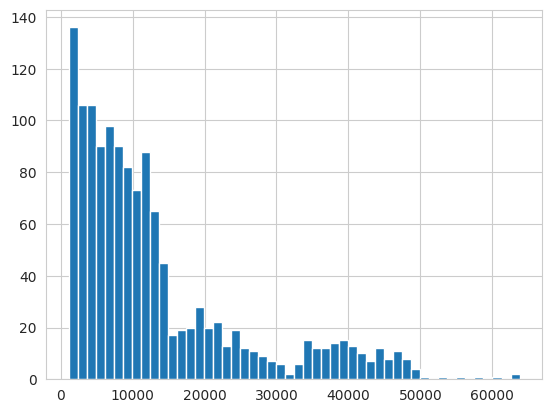

In [ ]:
df.shape
df.charges.hist(bins =50)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [ ]:
df[df['charges']>50000]
df= df[df['charges']<50000]

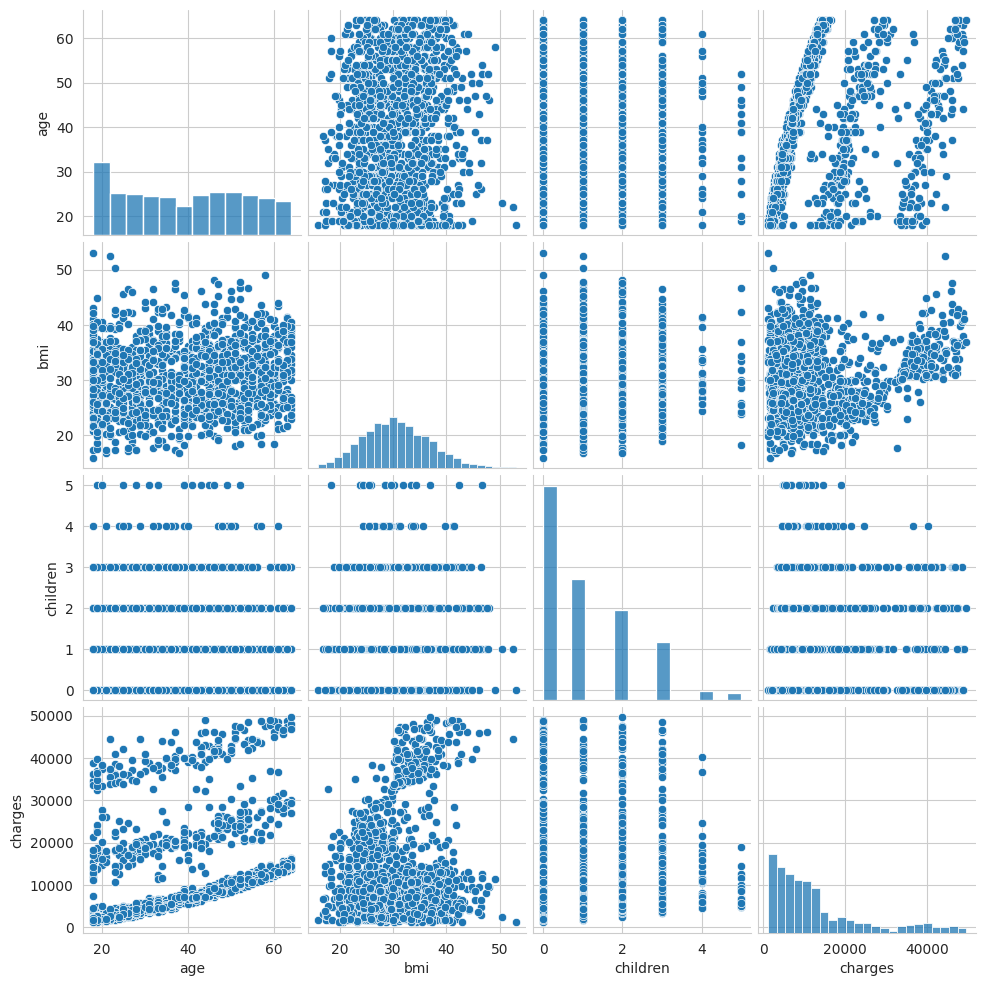

In [ ]:
sns.pairplot(df)


<ipython-input-6-e08d9c249f07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

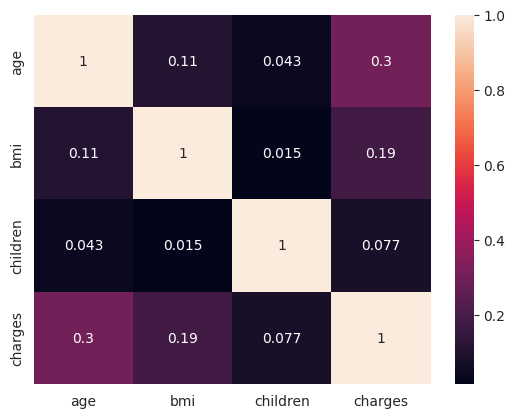

In [ ]:
sns.heatmap(df.corr(),annot = True)
# df[df[['age', 'bmi', 'children', 'charges']]]
# df[['age','bmi']]
# df.corr()


In [ ]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.108331,0.043197,0.304561
bmi,0.108331,1.000000,0.014860,0.187061
children,0.043197,0.014860,1.000000,0.076993
charges,0.304561,0.187061,0.076993,1.000000


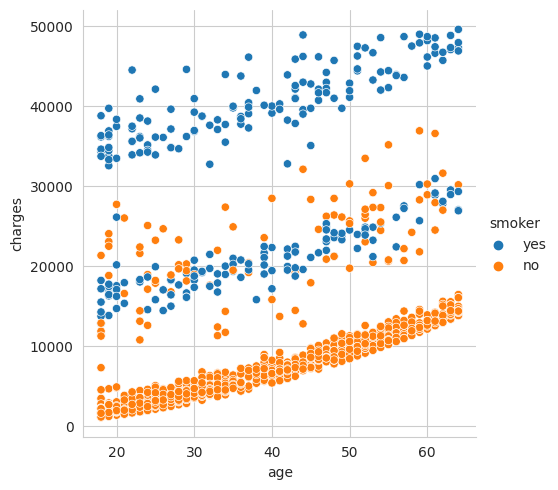

In [ ]:
sns.relplot(
    data = df,
    y=df['charges'],
    x=df['age'],
    # kind='hist',
    hue='smoker'
)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

In [ ]:
df= pd.get_dummies(df,columns=['sex','region','smoker'],drop_first=True)

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

## Creando modelos
Primero se usará un modelo con todas las variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_cols = list(set(df.columns)-set(['charges']))
y_cols = ['charges']


x = df[x_cols].values
y = df[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y)




In [ ]:
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)



x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [ ]:
  import sklearn.metrics as metrics
  ms = metrics.mean_squared_error(pred,y_test)
  r2 = metrics.r2_score(pred,y_test)

  print("MS:   ",ms.round(4))
  print("R2:   ",r2.round(4))

MS:    0.2223
R2:    0.6997


El siguiente código muestra un resumen general de los resultados.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

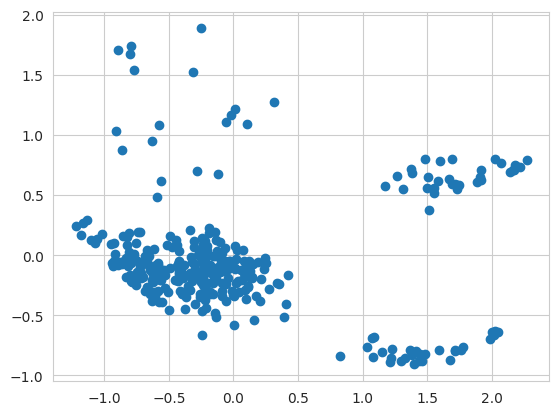

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

residuals = np.subtract(y_test,pred.reshape(-1,1))

plt.scatter(pred,residuals)
plt.show()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
df_second = df.copy()
df_second['age2'] = df_second.age **2
df_second['sobre_peso'] = (df_second.bmi >= 30).astype(int)
df_second['Sobre_pesos*fumador'] = df_second.sobre_peso * df_second.smoker_yes

Analizando el segundo modelo

In [ ]:
x_cols = list(set(df_second.columns)-set(['charges']))
y_cols = ['charges']

x = df_second[x_cols].values
y = df_second[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y)


sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)



x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
pred.shape

(333, 1)

## Metricas de Modelo

In [ ]:
  # import sklearn.metrics as metrics
  ms = metrics.mean_squared_error(pred,y_test)
  r2 = metrics.r2_score(pred,y_test)

  print("MS:   ",ms.round(4))
  print("R2:   ",r2.round(4))

MS:    0.1225
R2:    0.8645


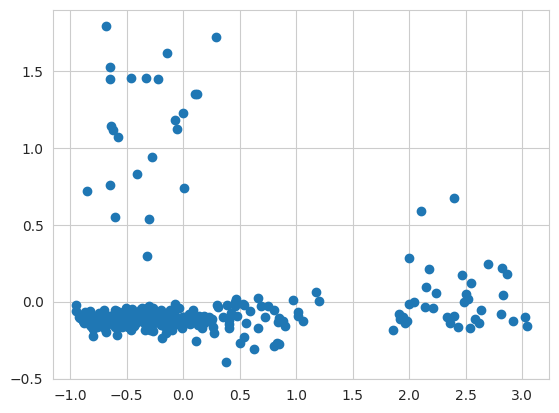

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

residuals = np.subtract(y_test,pred.reshape(-1,1))
plt.scatter(pred,residuals)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
stats_model = sm.OLS(y_test,pred.reshape(-1,1)).fit()


In [ ]:
print(stats_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              2474.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                   6.07e-156
Time:                        14:33:38   Log-Likelihood:                         -122.86
No. Observations:                 333   AIC:                                      247.7
Df Residuals:                     332   BIC:                                      251.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Resultado del model con datos reales

In [ ]:

# edad_std = sc_x.transform(np.array([x_test[0]]).reshape(1,-1))
print("The charges may be: ", sc_y.inverse_transform(model.predict((x_test[0]).reshape(1,-1))))

The charges may be:  [[13277.0937299]]
